# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:\\Users\\Admin\\OneDrive - Đại học FPT- FPT University\\This PC\\Documents\\Datasets\\bank\\Customer-Churn-Records.csv', sep=',')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
df.describe(include='object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [7]:
df.dtypes


RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [8]:
df.columns.values.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned']

In [9]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
df.duplicated().sum()

0

# EDA

<Axes: >

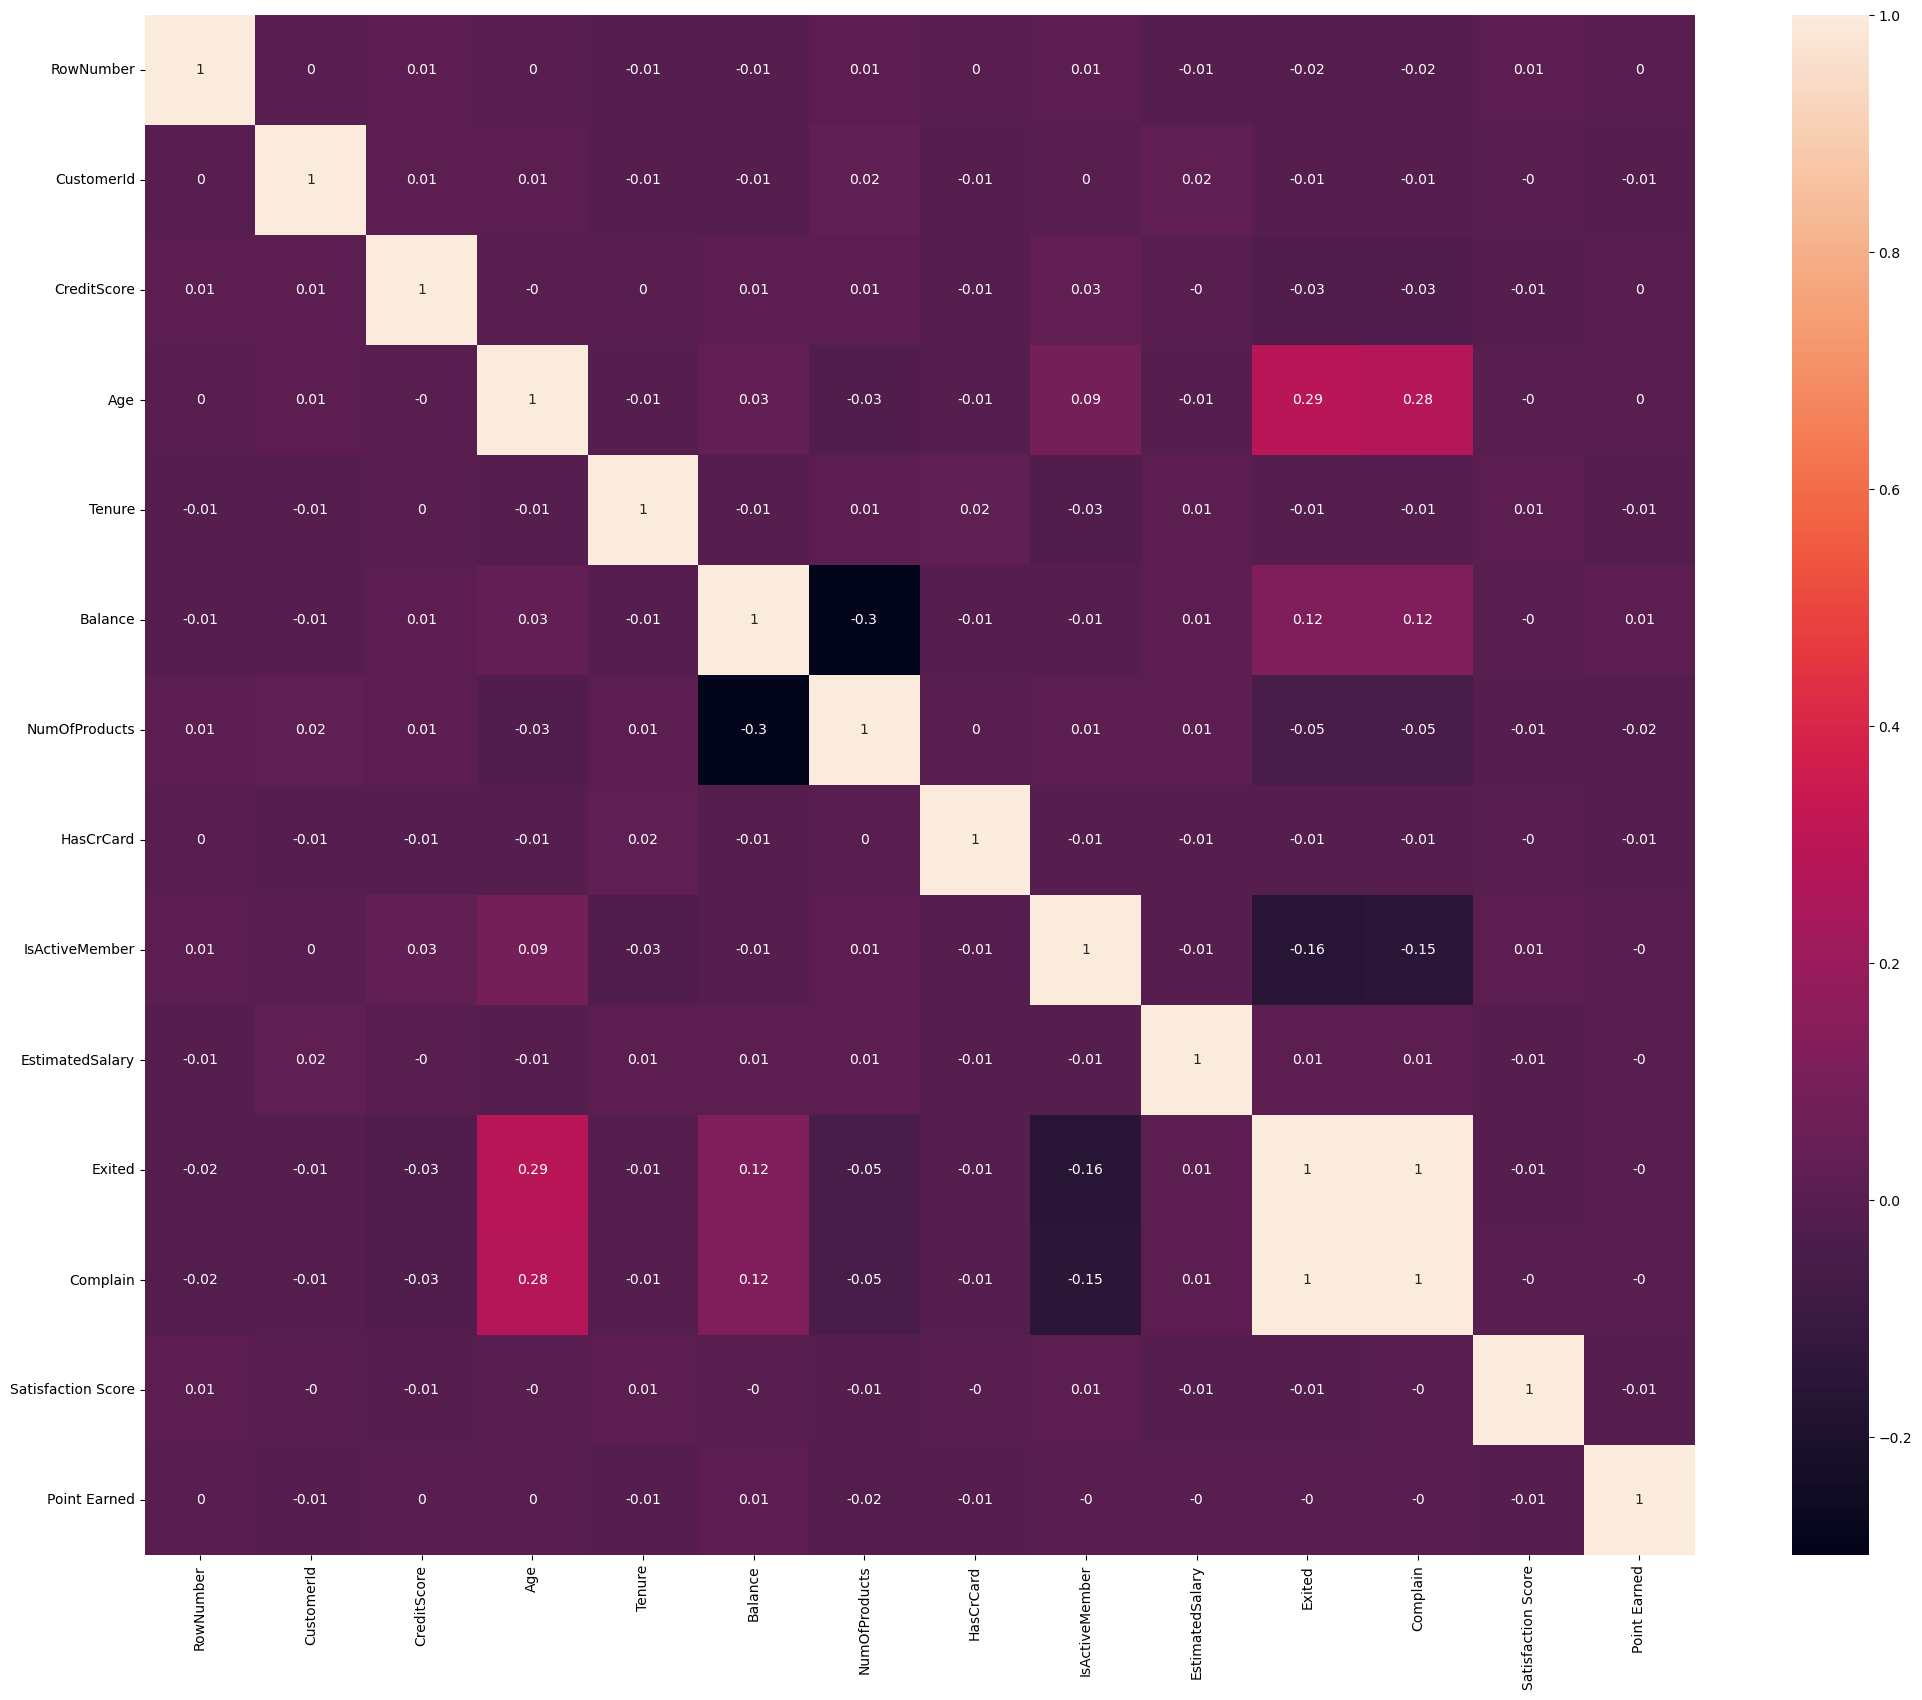

In [11]:
corr = df.corr(numeric_only=True).round(2)
plt.figure(figsize = (25, 20))
sns.heatmap(corr, annot = True)

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

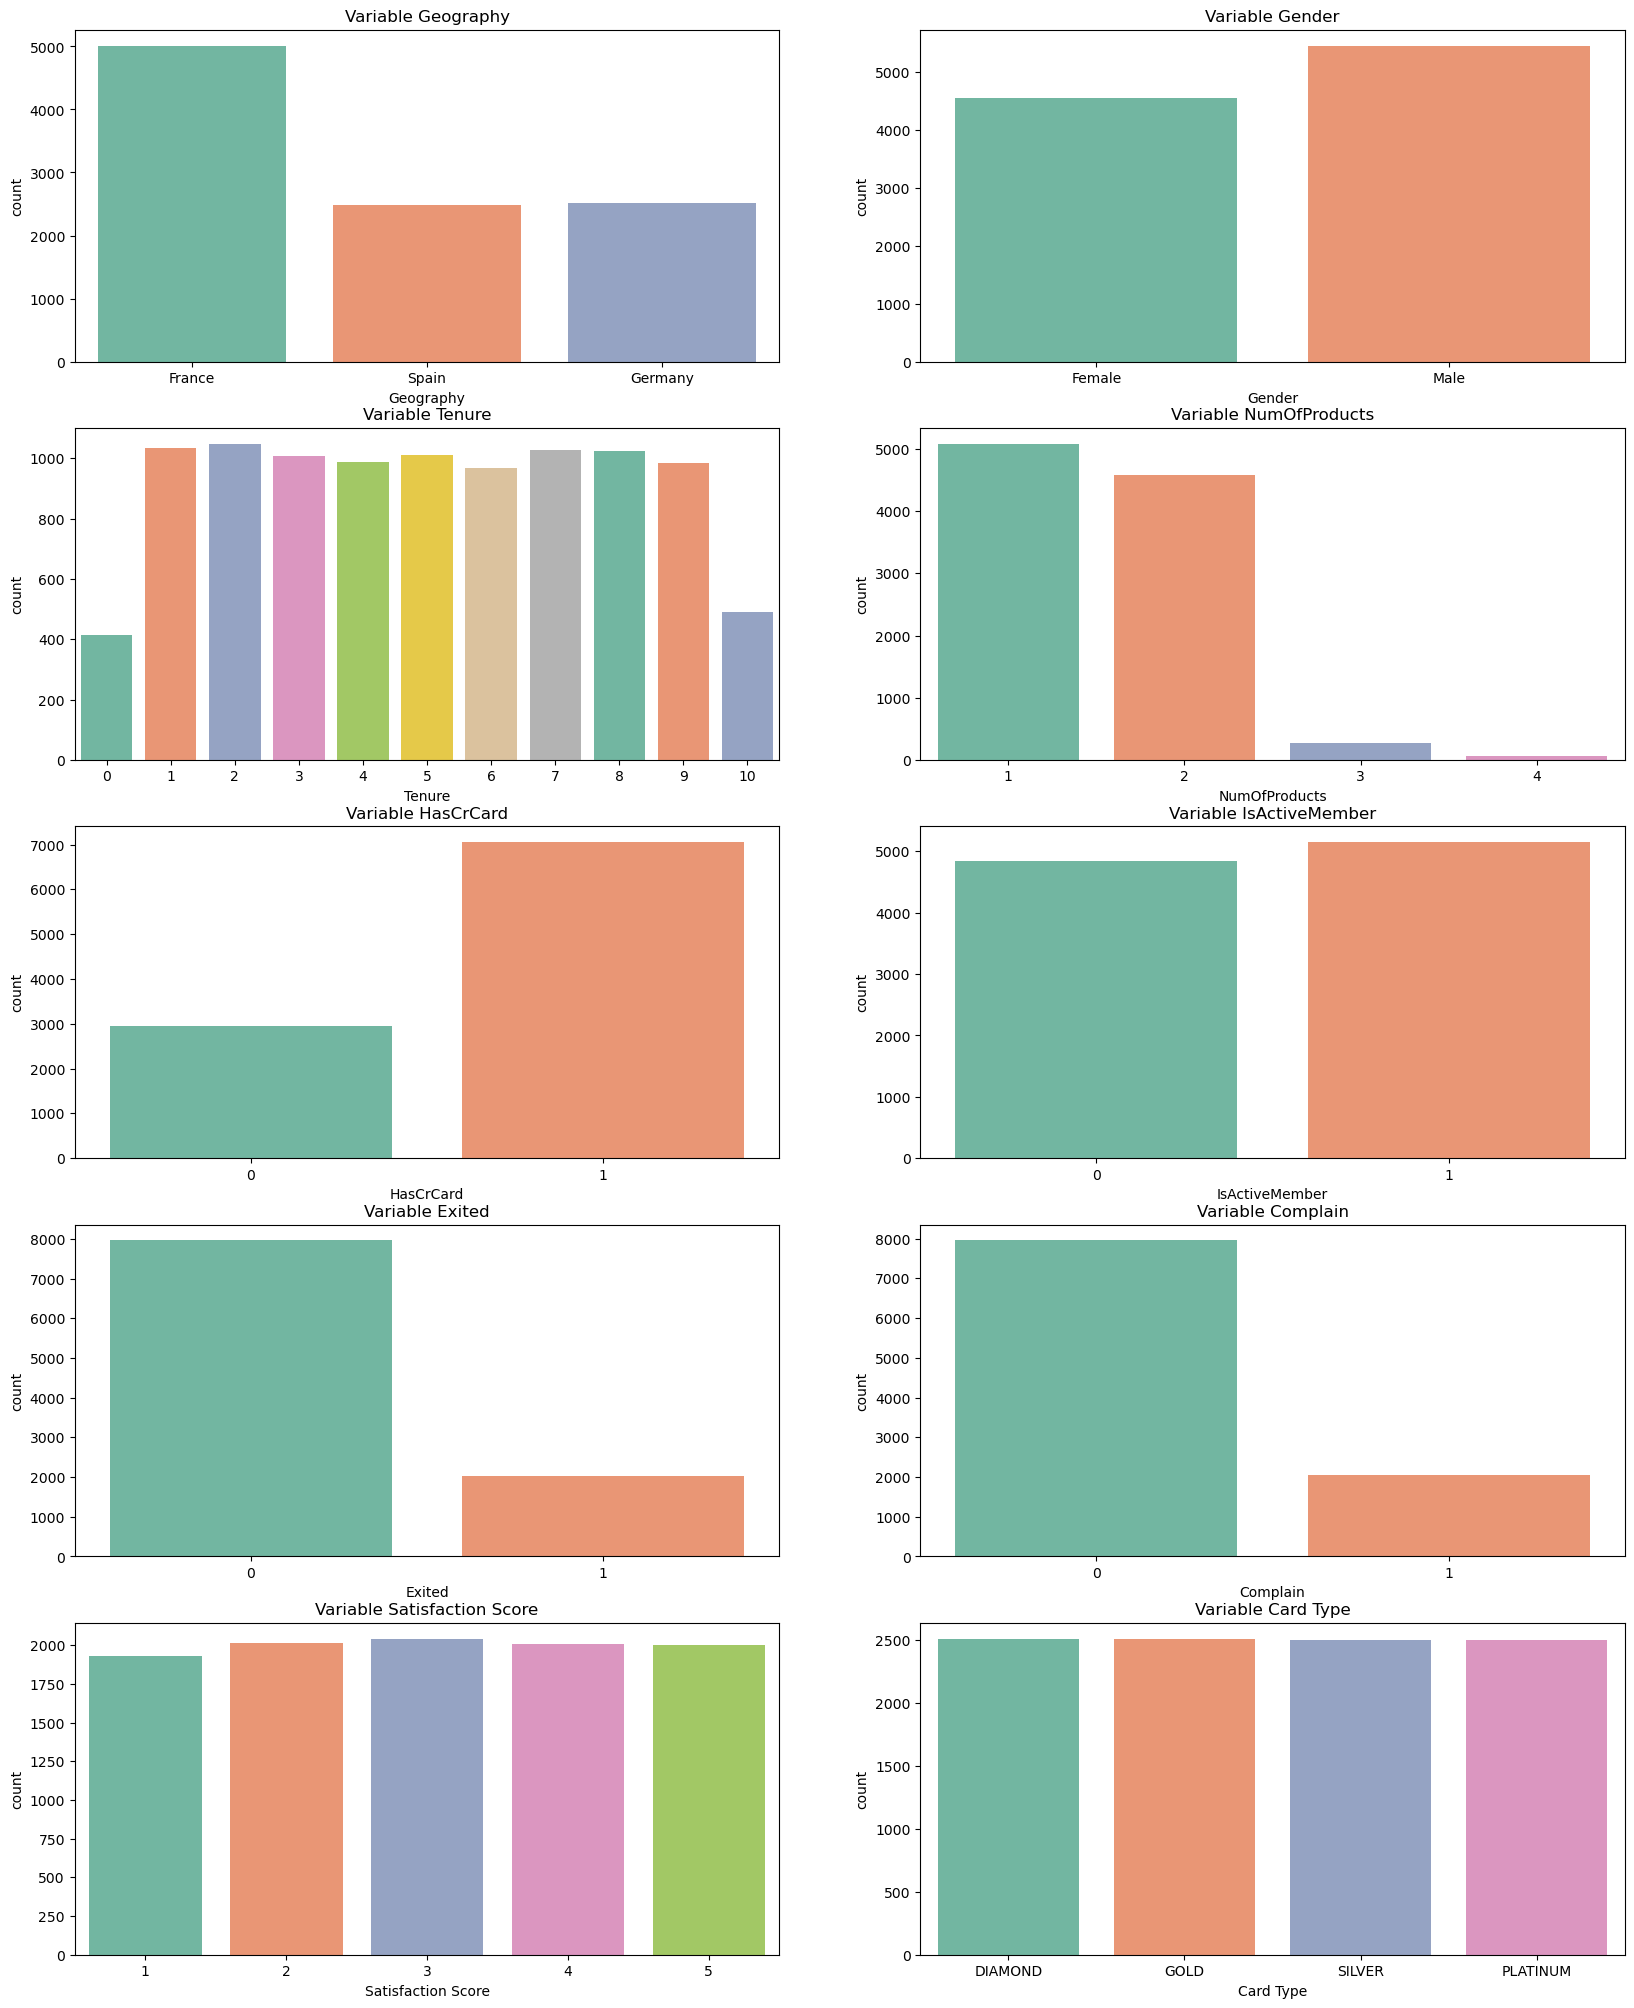

In [12]:
plt.figure(figsize=(20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', palette = 'Set2', data = df)

<Axes: xlabel='Point Earned', ylabel='Count'>

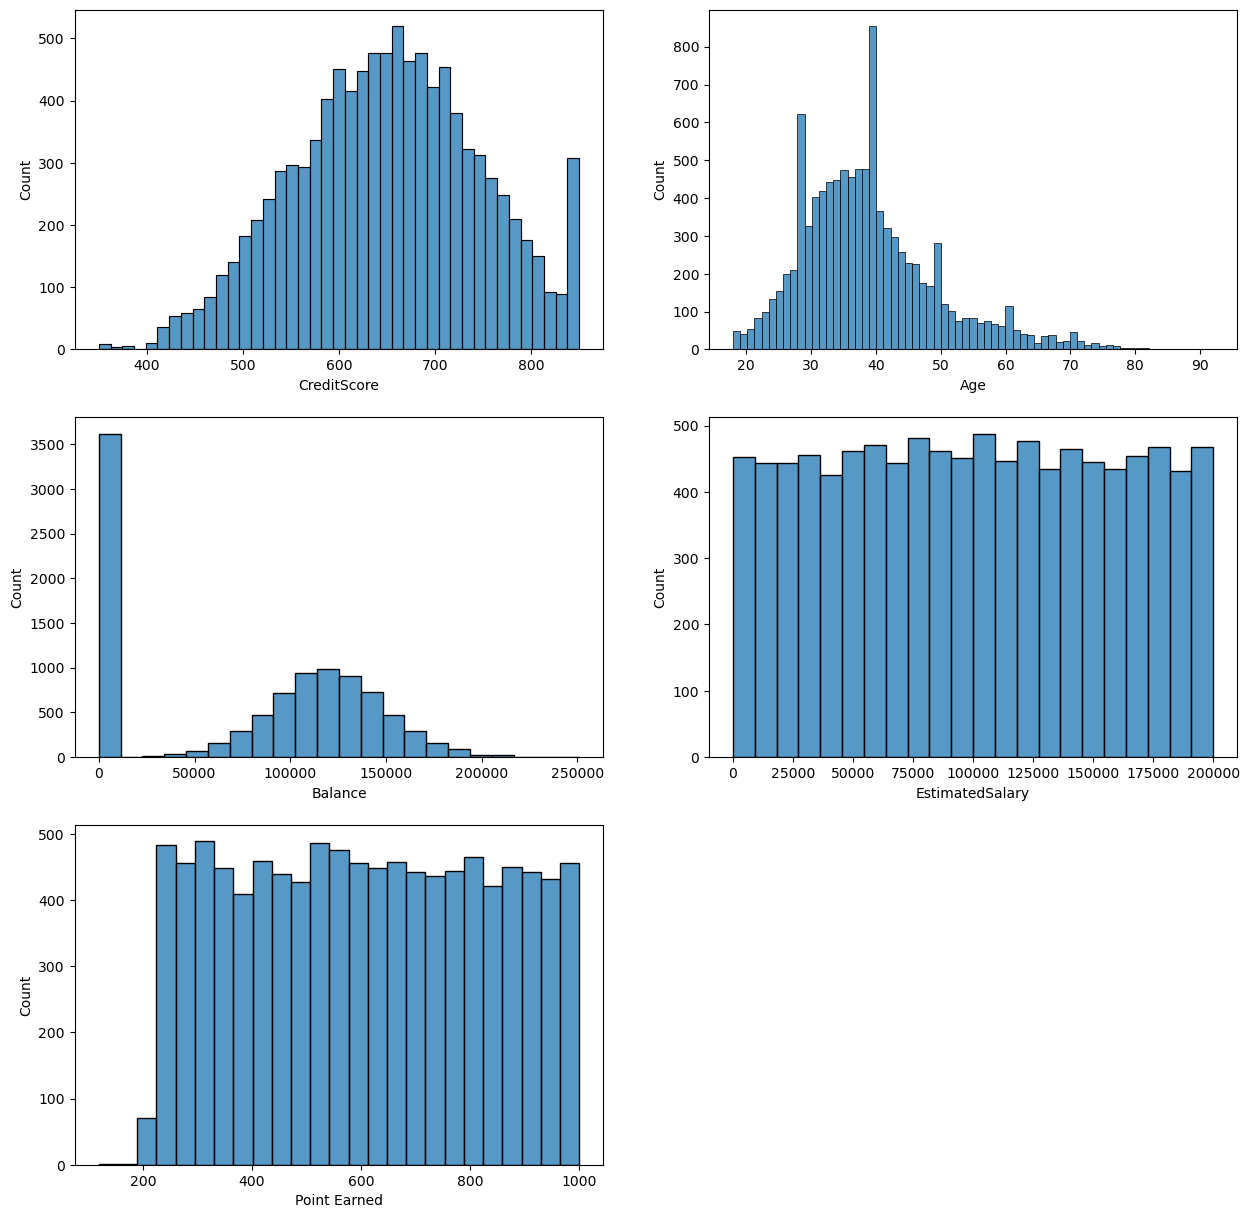

In [13]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point Earned'], kde = False)

<Axes: title={'center': 'Boxplot Point Earned'}, xlabel='Point Earned'>

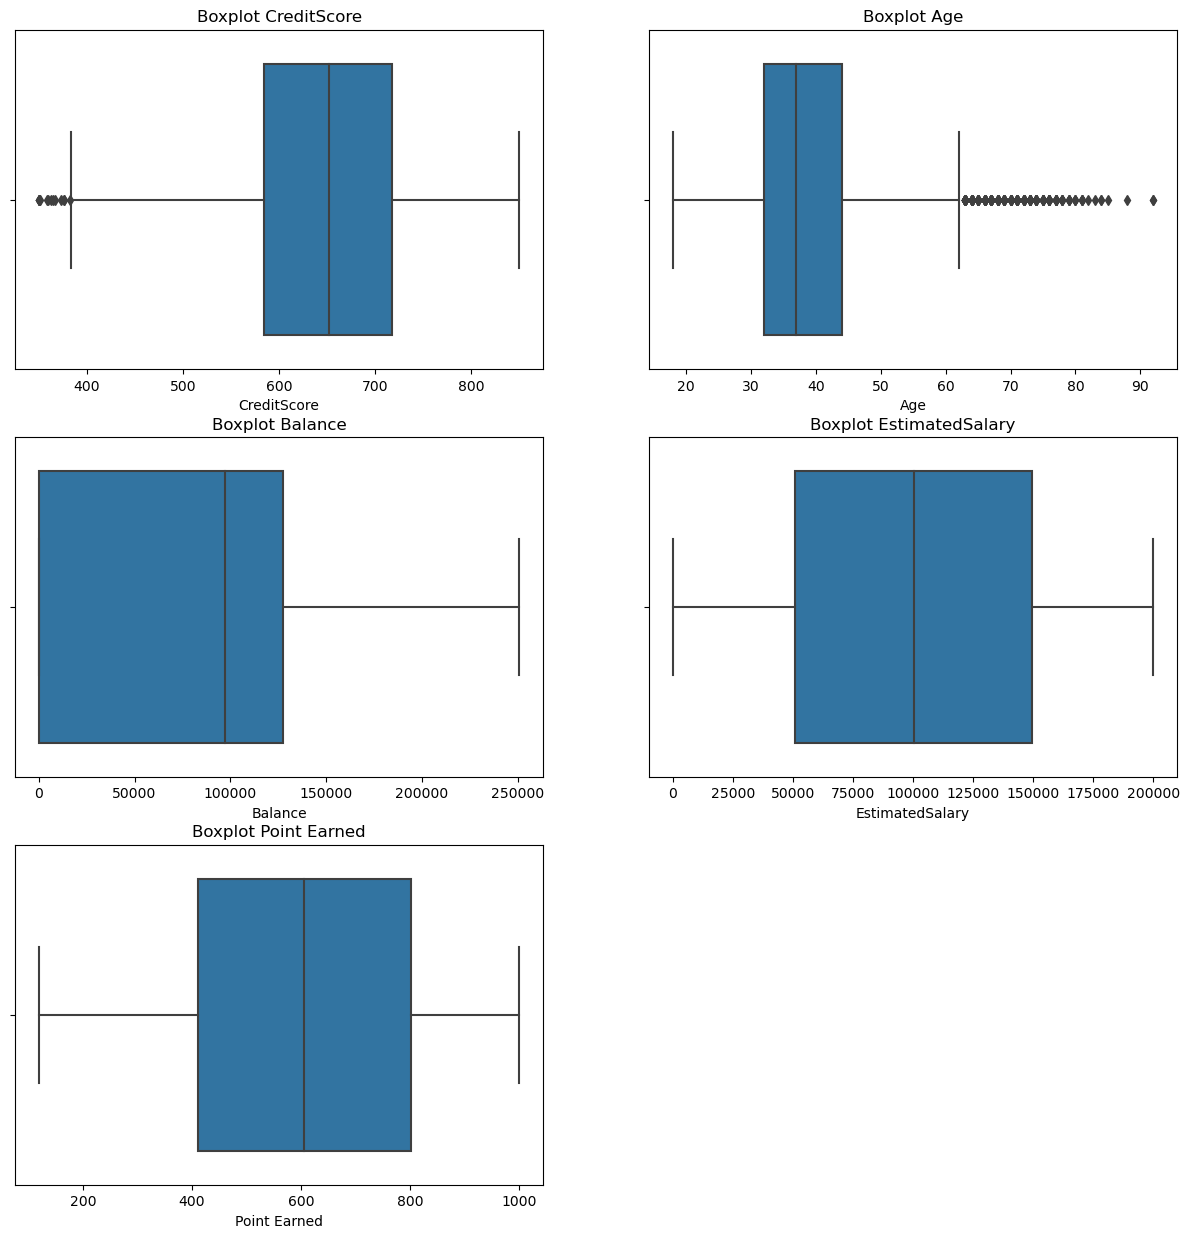

In [14]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.title("Boxplot CreditScore")
sns.boxplot(x=df["CreditScore"])

plt.subplot(3, 2, 2)
plt.title("Boxplot Age")
sns.boxplot(x=df["Age"])

plt.subplot(3, 2, 3)
plt.title("Boxplot Balance")
sns.boxplot(x=df["Balance"])

plt.subplot(3, 2, 4)
plt.title("Boxplot EstimatedSalary")
sns.boxplot(x=df["EstimatedSalary"])

plt.subplot(3, 2, 5)
plt.title("Boxplot Point Earned")
sns.boxplot(x=df["Point Earned"])

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

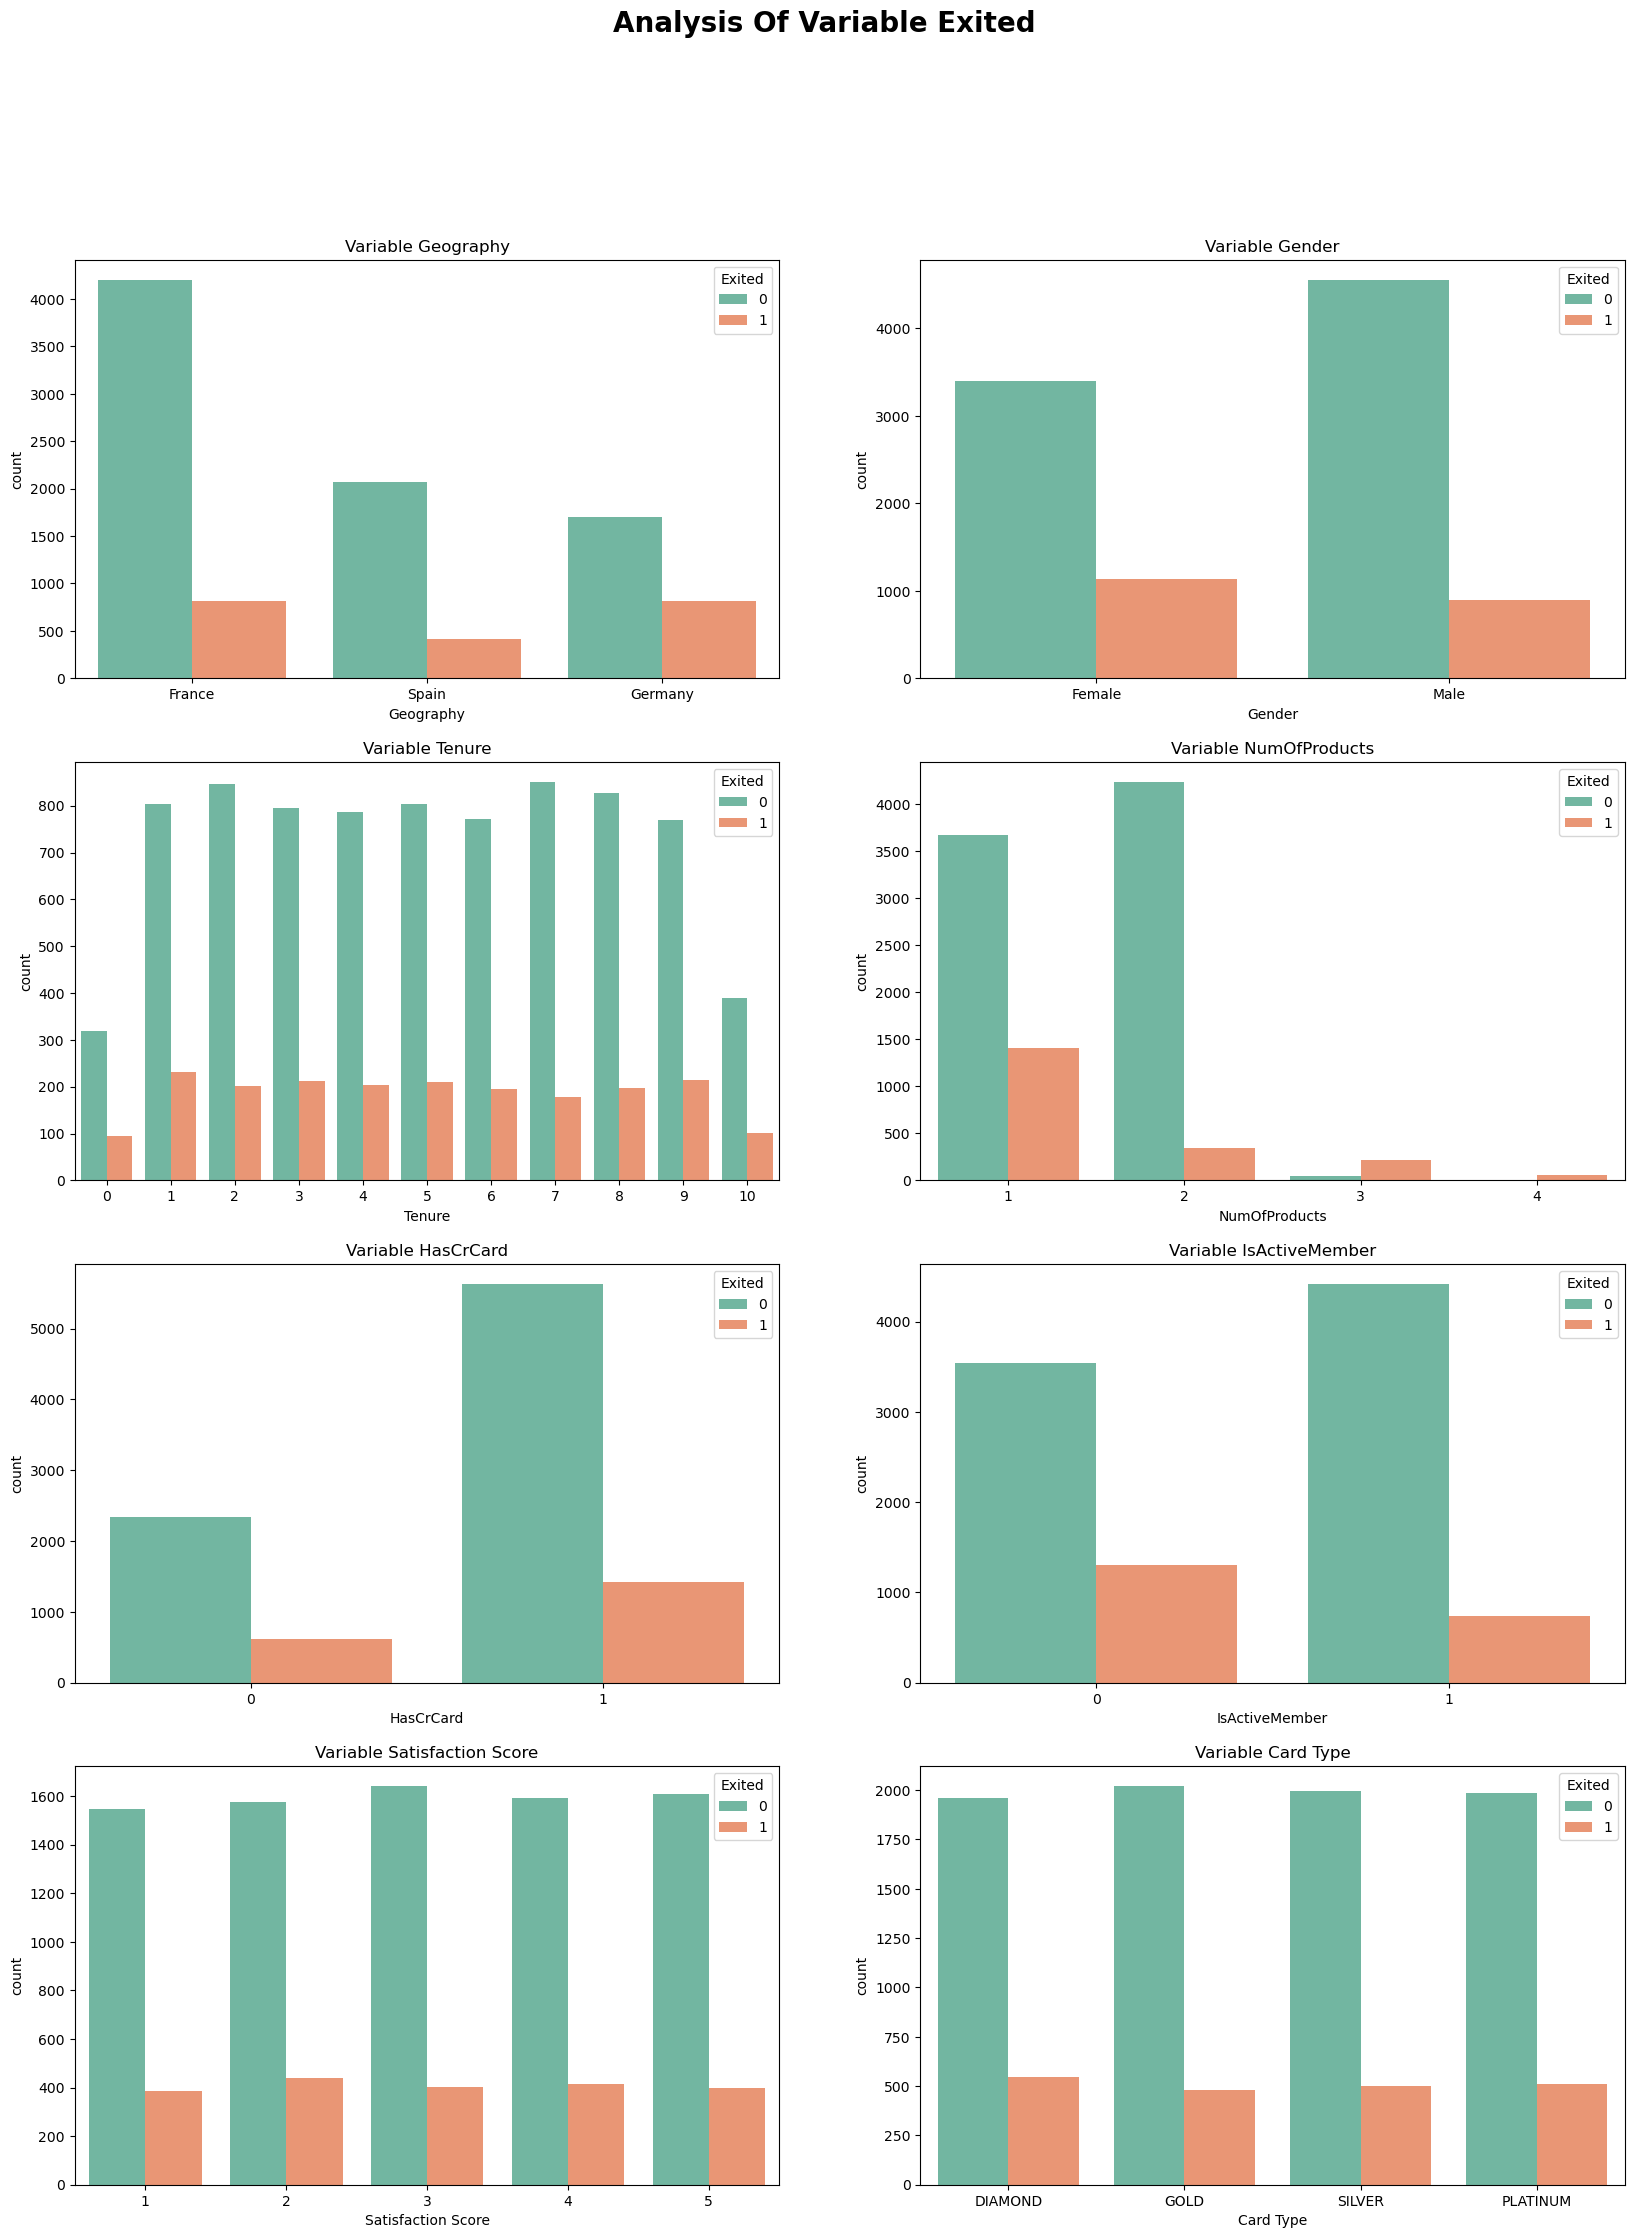

In [15]:
plt.figure(figsize=(20, 25))
plt.suptitle("Analysis Of Variable Exited", fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

<Axes: xlabel='Exited', ylabel='Point Earned'>

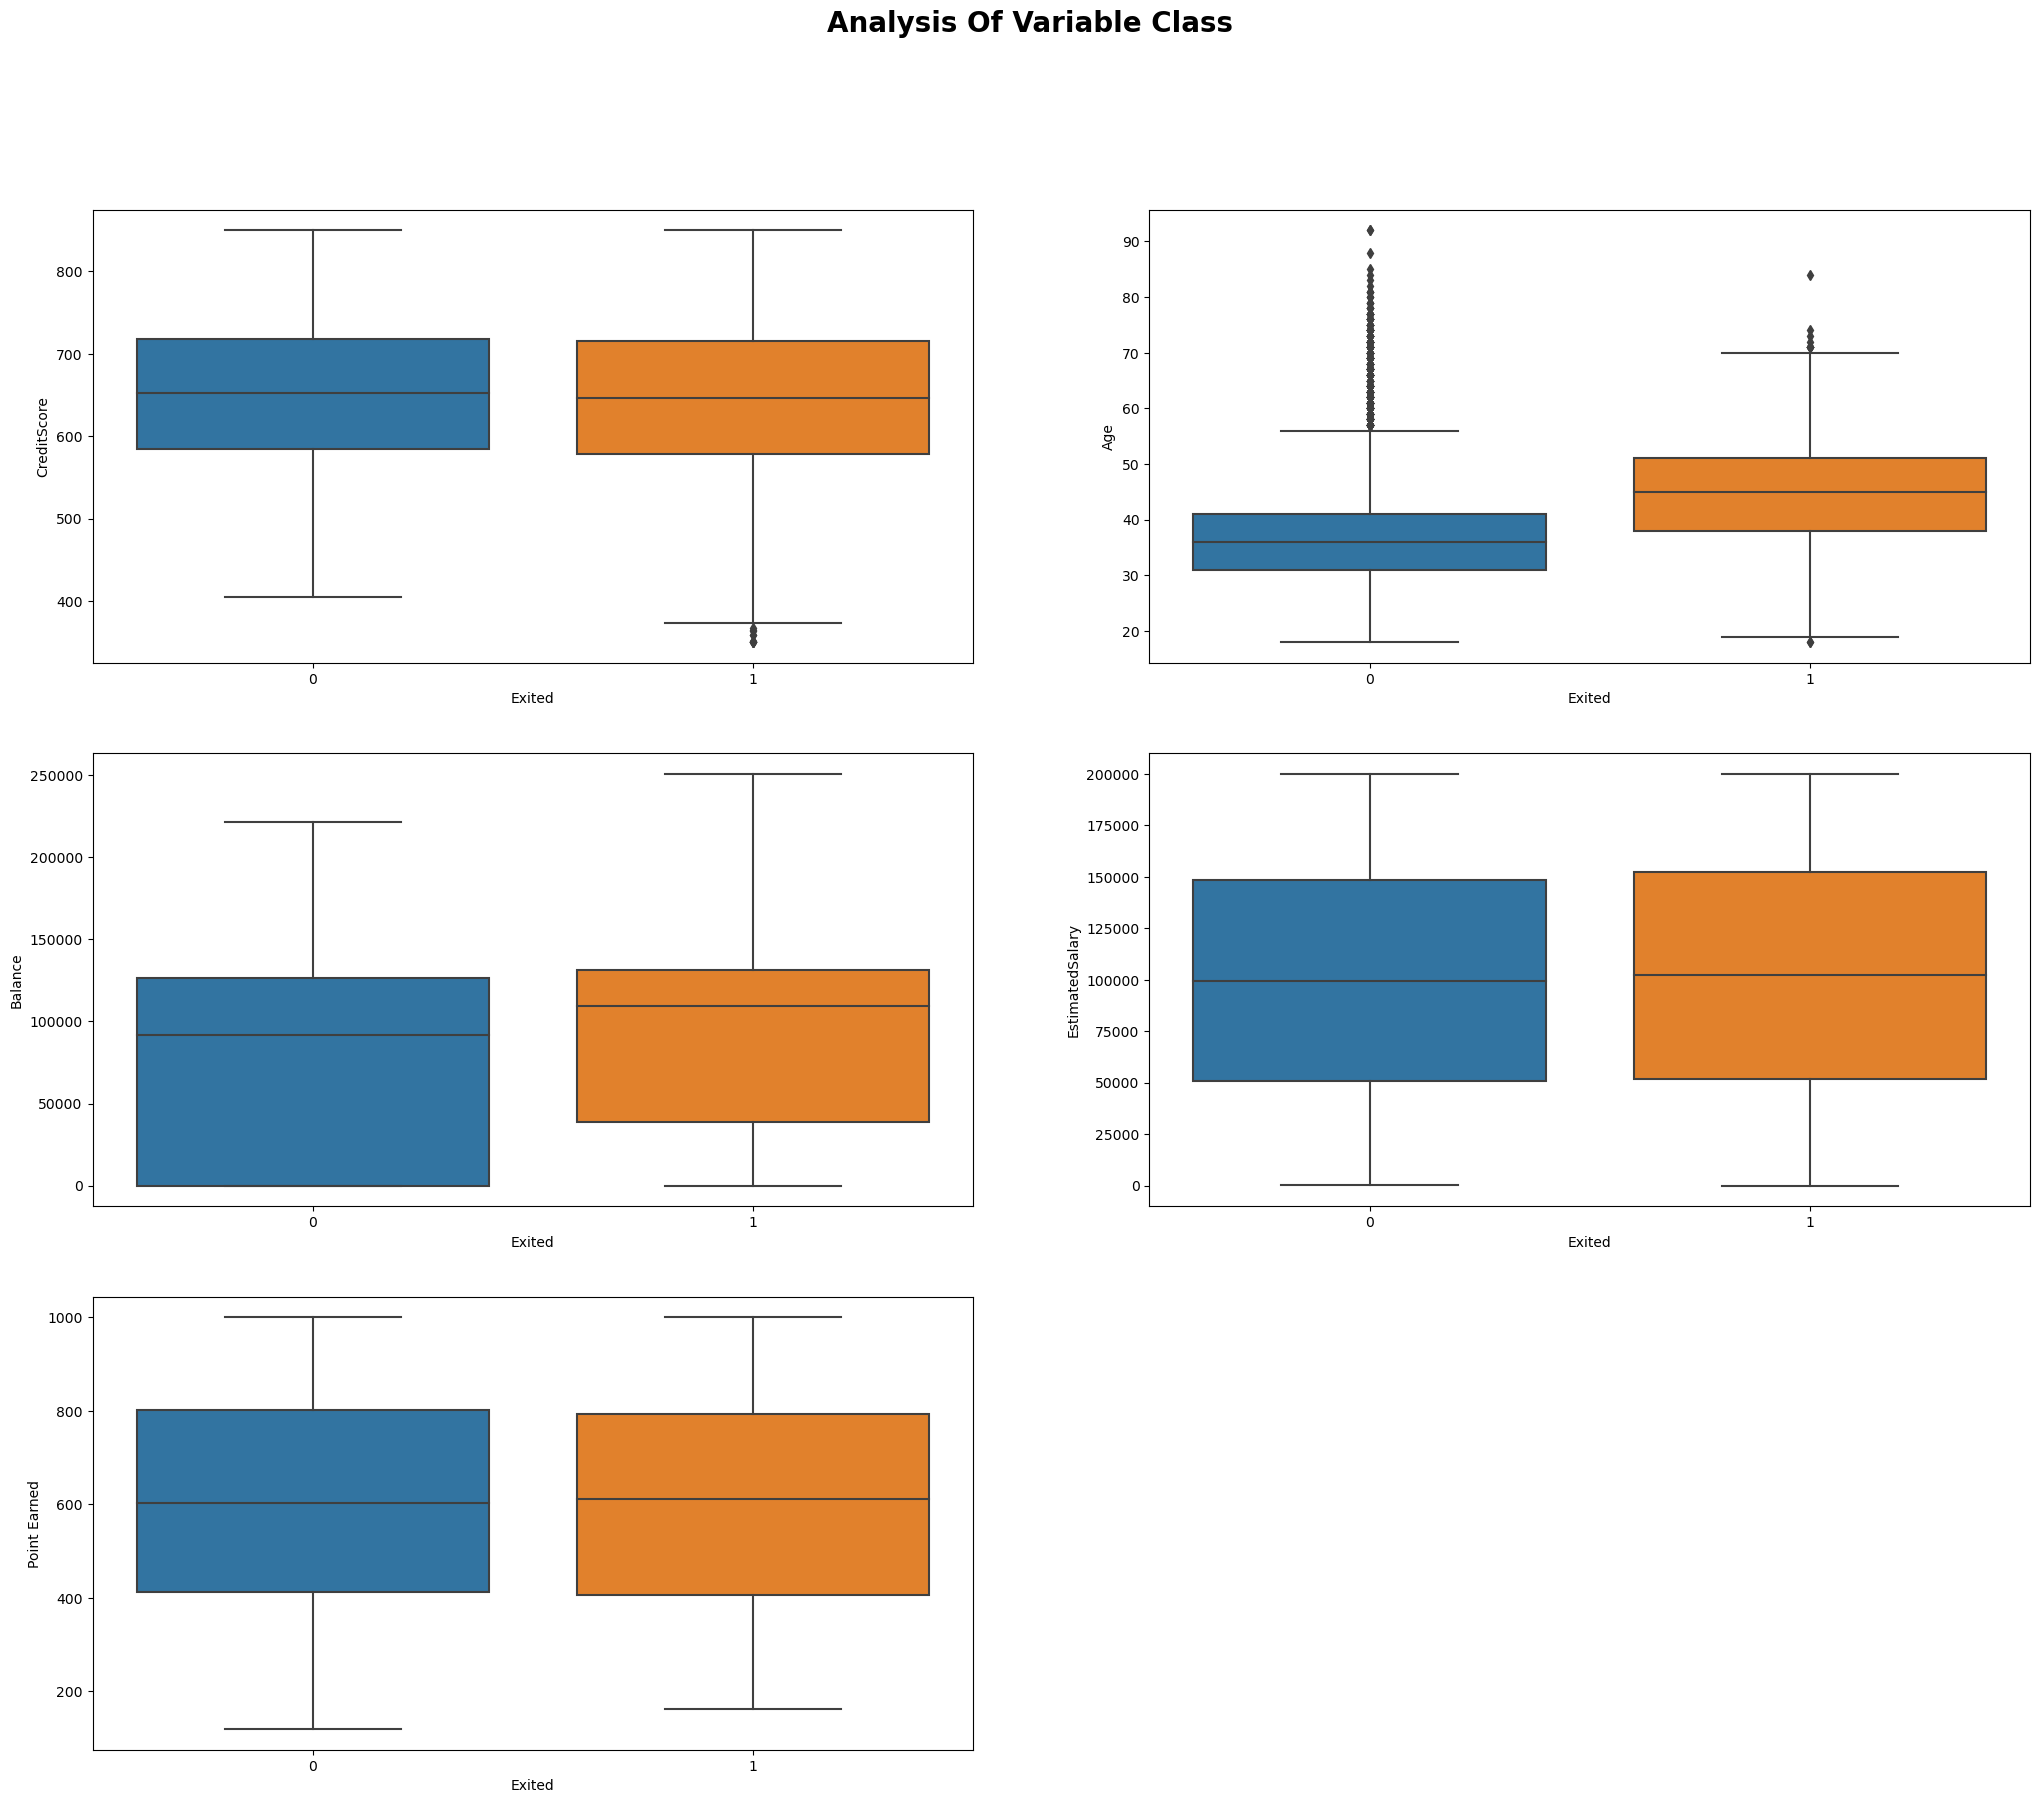

In [16]:
plt.figure(figsize=(25, 20))
plt.suptitle("Analysis Of Variable Class", fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

# Modeling

In [17]:
encoder = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])
df = pd.concat([df, encoder], axis=1)
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Card Type'], axis=1)

In [18]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [19]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [21]:
sampler = RandomOverSampler(random_state=42)
x_train, y_train = sampler.fit_resample(x_train, y_train)

In [22]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred = naive_bayes.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       1.00      1.00      1.00       497

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [23]:
params_grid = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
            'min_samples_split': [2, 3, 4, 5, 6, 7],
            'criterion': ['entropy', 'gini']
            }

tree = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(tree, params_grid, cv = 3, n_jobs = -1)
gridDecisionTree.fit(x_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  6
Algorithm:  entropy
Score:  0.9989092622263048


In [24]:
decision_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=6, random_state=42)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.99      1.00      0.99       497

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [25]:
columns = df.drop('Exited', axis=1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index=columns).sort_values(ascending=False)
feature_imp

Complain              0.985113
EstimatedSalary       0.005764
Balance               0.004594
Point Earned          0.002792
Age                   0.000756
Gender_Female         0.000509
NumOfProducts         0.000473
Geography_Spain       0.000000
Card Type_PLATINUM    0.000000
Card Type_GOLD        0.000000
Card Type_DIAMOND     0.000000
Gender_Male           0.000000
CreditScore           0.000000
Geography_Germany     0.000000
Geography_France      0.000000
Satisfaction Score    0.000000
IsActiveMember        0.000000
HasCrCard             0.000000
Tenure                0.000000
Card Type_SILVER      0.000000
dtype: float64

# Insights

Looking at our database we can see that although we have a lot of columns with a lot of information, the number of customers is not very large, we have 10000 data and 18 columns, we can verify that we have categorical variables and continuous variables, something that facilitates the our work is that we do not have null values, which does not require treatment.
Speaking about the analysis of our data, we can see that we have an absolute correlation between the Complain variables and our Target variable, with that we exclude the Complain variable so that we can run our models, looking at the exploratory analysis we can verify that a good part of the our data are well distributed, we can see some peculiarities such as the majority of customers are from France, usually between 1 and 2 products, a good part of our customers do not have money in their account, and we can see that the age of our customers meets a distribution normal, a very important thing we saw is that our Target variable is unbalanced.
We have some small Outliers but it is nothing that influences or harms our data, when we look at our Bivariate analysis a variable that caught my attention was the Age variable, when we look at it we can see that older people are more prone to have churn.
Entering the Machine Learning part, we removed some variables that do not make sense for our models, we transformed our Categorical variables into Continuous variables using the OneHot Label Encoder (I had a better result using OneHot than the Label Encoder), we separated our data into training with 70% of our data and testing with 30%, as mentioned earlier our Target variable is unbalanced, so after running the models I was able to confirm this, without balancing the data our results were good but the model learned only the model with negative churn and not the result we seek.
After balancing our Target class and running the Machine Learning models we got some good results and some not so much, most of the models had a satisfactory result learning both the negative result and the positive result, and others learned only the negative result and not the our objective result, in terms of accuracy, the best model was the Random Forest with 83.63%, but the model that best managed to predict our Target variable was the Ada Boost model, where we had 78% accuracy but a greater accuracy when we speak in predicting Churn.
When we look at the most important variables, we have Complain, Estimated_Salary, Balance, Point Earned, Age, NumOfProducts and Balance, with Age being the main one, which confirms what we saw in our exploratory analysis.